In [ ]:
# The data I used for this project was originally found at this web address
# https://www.stats.govt.nz/large-datasets/csv-files-for-download/
# It was found under the environment catagory, titled:
# Greenhouse gas emissions (industry and household): September 2022 quarter
# It is a public dataset that is free to download. However, I could not find a concrete CC license. 
# Full disclousure, I did edit the data I used so I will be attaching the exact file that I used
# to the project. Why did I edit the file instead of using coding for further filter it?
# Cause I was struggling to make sure more than one filter was actually working, let alone two. 
# The only edit is that I removed the data that was labeled "seasonally adjusted" and just went with
# the ones labeled "Actual". The original dataset was 100KB. I reduced it to 48KB.
# The data has 8 columns, Anzsic, Anzsic_Description, Period, Data_value, Variable, Units, Gas, and Status
# I focused my attention on Anzsic, Anzsic_Description andd Period, which was all string data
# as well as Data_value, which consisted of integers. 
# The remaining columns had no variation in the data listed. Units was Kilotonnes, Gas was Carbon Dioxide Equivalent, and Status was P.
# No, I do not know what P means as a status and I couldn't find an answer. 

#The following is my peer graphs, they are slightly more complex and use bright colors. 

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
#Define filepath because Mac coding isn't great

data = pd.read_csv('/Users/megnoone/Desktop/School Shit/Grad School Stuff/Spring 2023/greenhouse-gas-emissions-industry-and-household-September-2022-quarter.csv', usecols=['Anzsic','Data_value','Period'])

In [100]:
# Create separate data frames for each quarter
q1_data = data[(data['Period'] == '2020Q1') & (data['Anzsic'] == 'CCZ')]
q2_data = data[(data['Period'] == '2020Q2') & (data['Anzsic'] == 'CCZ')]
q3_data = data[(data['Period'] == '2020Q3') & (data['Anzsic'] == 'CCZ')]
q4_data = data[(data['Period'] == '2020Q4') & (data['Anzsic'] == 'CCZ')]

In [101]:
# Combine total emissions for each quarter
totals = [q1_total, q2_total, q3_total, q4_total]

In [102]:
q1_total = q1_data['Data_value'].sum()
q2_total = q2_data['Data_value'].sum()
q3_total = q3_data['Data_value'].sum()
q4_total = q4_data['Data_value'].sum()

In [103]:
totals = [q1_total, q2_total, q3_total, q4_total]

In [104]:
colors = ['orange','green','purple','red']

Text(0.5, 1.0, '% of CO2 Emissions by Manufacturing Sector in 2020')

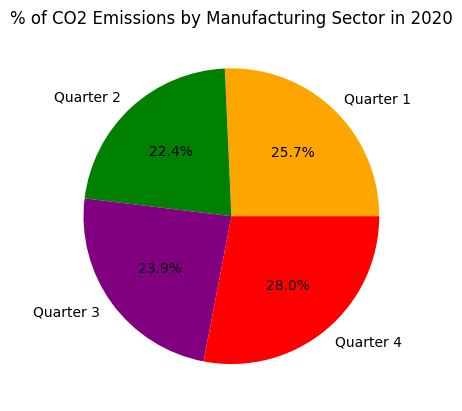

In [105]:
fig, ax = plt.subplots()
ax.pie(totals, labels=['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'], autopct='%1.1f%%', colors=colors)
ax.set_title('% of CO2 Emissions by Manufacturing Sector in 2020')

In [106]:
#Let's try adding more parameters! 
q5_data = data[(data['Period'] == '2021Q1') & (data['Anzsic'] == 'CCZ')]
q6_data = data[(data['Period'] == '2021Q2') & (data['Anzsic'] == 'CCZ')]
q7_data = data[(data['Period'] == '2021Q3') & (data['Anzsic'] == 'CCZ')]
q8_data = data[(data['Period'] == '2021Q4') & (data['Anzsic'] == 'CCZ')]

In [107]:
q5_total = q5_data['Data_value'].sum()
q6_total = q6_data['Data_value'].sum()
q7_total = q7_data['Data_value'].sum()
q8_total = q8_data['Data_value'].sum()

In [108]:
totals = [q1_total, q2_total, q3_total, q4_total, q5_total, q6_total, q7_total, q8_total]

Text(0, 0.5, 'Total CO2 Emissions (Kilotonnes)')

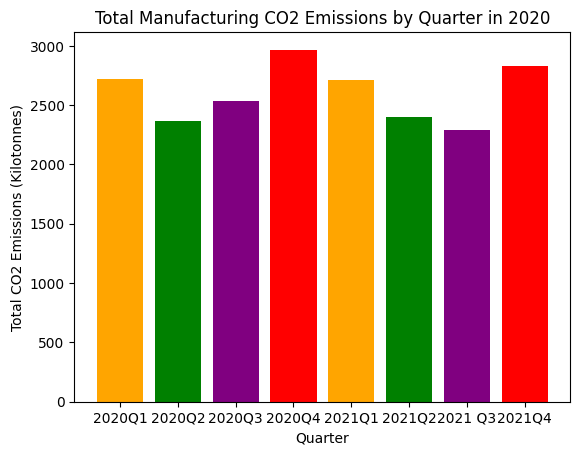

In [109]:
#And let's switch it to a bar chart to better get an idea of the 
fig, ax = plt.subplots()
ax.bar(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021 Q3', '2021Q4'], totals, color=colors)

ax.set_title('Total Manufacturing CO2 Emissions by Quarter in 2020')
ax.set_xlabel('Quarter')
ax.set_ylabel('Total CO2 Emissions (Kilotonnes)')

In [110]:
#Finally, a line chart so we can get a better idea of the overall trends


In [111]:
category_data = data[(data['Period'].str.contains('2020')) & (data['Anzsic'] == 'CCZ') | data['Period'].str.contains('2021') & (data['Anzsic'] == 'CCZ')]
period_totals = category_data.groupby('Period')['Data_value'].sum()


Text(0, 0.5, 'Total CO2 Emissions (Kilotonnes)')

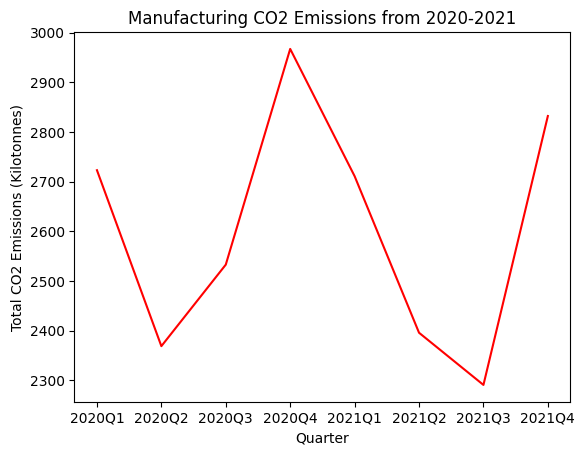

In [112]:
fig, ax = plt.subplots()
ax.plot(period_totals.index, period_totals, color='red')
ax.set_title('Manufacturing CO2 Emissions from 2020-2021')
ax.set_xlabel('Quarter')
ax.set_ylabel('Total CO2 Emissions (Kilotonnes)')